<h1>ML_Pattern_Classification project | Main File</h1>


In [1]:
#import BirdsData from BirdExplore
from BirdExplore import BirdsData
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


NotADirectoryError: [Errno 20] Not a directory: 'ptichki/.DS_Store'

In [ ]:
BirdsData('bird_data').labels_distribution()

In [ ]:
def get_sound_label(species, sample,project_folder):
    folder_path = os.path.join(project_folder, species)
    file_list = os.listdir(folder_path)
    for file in file_list:
        if file.endswith('.npy'):
            file_path = os.path.join(folder_path, sample)
            data = np.load(f'{file_path}.npy')
            label = np.load(f'{file_path}.labels.npy')
            return data

data = get_sound_label('comcuc','25627','ptichki')

<h3>Load dataset</h3>

In [ ]:
united_data = BirdsData('ptichki').united_dataset()
print(united_data.shape)

In [ ]:
# df = pd.DataFrame(united_data,columns=)
full_df = BirdsData('ptichki').get_dataframe()

<h4>Create correlation histogram between labels by choosing threshold to improve readability. Needs to be fixed</h4>

In [ ]:
corr = full_df.corr()
threshold = 0.9
filtered_corr = corr[(corr >= threshold) & (corr != 1.000)]
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(filtered_corr, annot=True, mask = mask, cmap='Reds')

<h4>Plotting MFCC for each bird species</h4>
<li>We can plot any features by chosing feature name</li>

In [2]:
def Plot_MFCC(data,target,cols,title='',plot_type='imshow'):
    filtered_data = data.loc[data['target'] == target]
    data = filtered_data[filtered_data.columns[cols]]
    plt.figure(figsize=(30, 20))
    #plt.subplot(3,1,1)
    if plot_type == 'imshow': 
        plt.imshow(data.T,cmap=plt.cm.jet, aspect='auto',origin='lower')
    elif plot_type == 'scatter':
        print(f'Mean value of {title} for {target} : {data.mean()}')
        plt.plot(np.squeeze(data))
    plt.ylabel('MFCC')
    plt.xlabel('Samples')
    plt.title(title)

def find_idx_by_string(data:list,string):
    res = []
    for idx,elem in enumerate(data):
        if string in elem:
            res.append(idx)
    return res

# Plot_MFCC(full_df,'comcuc',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Comcuc MFCC')
# Plot_MFCC(full_df,'cowpig1',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Cowpig MFCC')
# Plot_MFCC(full_df,'eucdov',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Eucdow MFCC')
# Plot_MFCC(full_df,'grswoo',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Grswoo MFCC')

<h3>Plotting call/drumming duration for each species</h3>

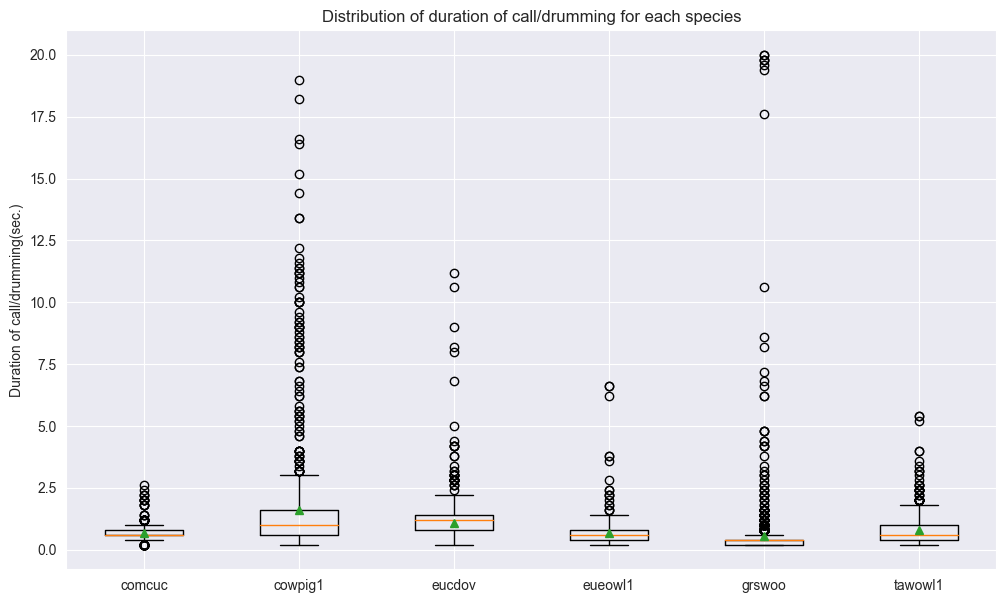

In [7]:
BirdsData('ptichki').species_call_distribution()

<h3>Use RandomForest to find most important features</h3>

In [9]:

data = full_df.drop('target',axis=1)
labels = full_df.loc[:, 'target']
print(data.shape)
print(labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.feature_importances_

(120000, 548)
(120000,)


array([0.00371898, 0.00120482, 0.00210306, 0.00201807, 0.00324717,
       0.00306815, 0.00353574, 0.00302375, 0.00399355, 0.00355718,
       0.0027093 , 0.00288464, 0.00261399, 0.00217342, 0.00233247,
       0.00175046, 0.00191109, 0.0018934 , 0.00211492, 0.0025835 ,
       0.0060372 , 0.00997319, 0.01343542, 0.01202577, 0.00484853,
       0.00367621, 0.0026882 , 0.00221233, 0.00220052, 0.00300767,
       0.00243372, 0.00203347, 0.00203657, 0.00186844, 0.00172928,
       0.00158603, 0.00194717, 0.00217785, 0.00221891, 0.00212051,
       0.0017014 , 0.00120308, 0.00111181, 0.00102773, 0.00100923,
       0.00111953, 0.0011414 , 0.00101564, 0.00112163, 0.00132798,
       0.00099188, 0.00103148, 0.00100892, 0.00102337, 0.00095956,
       0.00091507, 0.00095598, 0.00100077, 0.00099435, 0.0010378 ,
       0.00109225, 0.00119226, 0.00128556, 0.00091401, 0.001006  ,
       0.00110357, 0.00097557, 0.00120158, 0.00102129, 0.00114447,
       0.00133729, 0.00119945, 0.00147966, 0.00155297, 0.00167

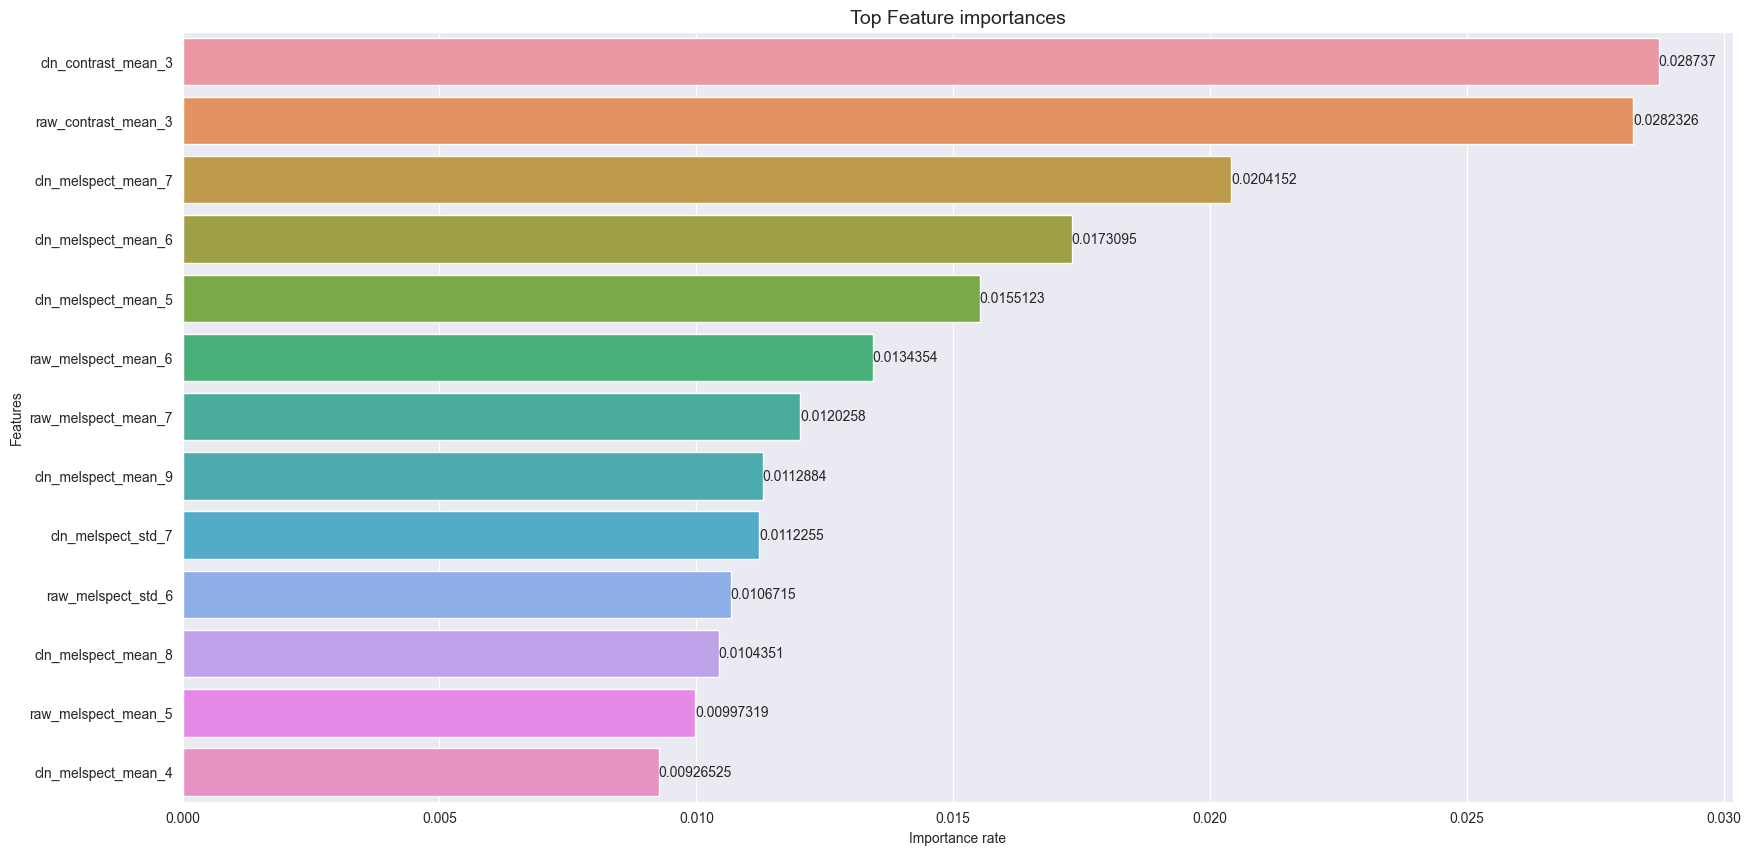

In [10]:
threshold = 0.009
importances = np.array(rf.feature_importances_)
names = np.array(rf.feature_names_in_,)

importances_filtered = np.where(importances >= threshold)[0]
features_filtered = names[importances_filtered]
importances_filtered = importances[importances_filtered]
importances_df = pd.DataFrame({"Features" : features_filtered, 
                               "Importance rate" : importances_filtered})
importances_df.sort_values(by=['Importance rate'], ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(20, 10))                        
g = sns.barplot(x=importances_df['Importance rate'], 
                y=importances_df['Features'],
                ax=ax)
g.set_title("Top Feature importances", fontsize=14)
for value in g.containers:
    g.bar_label(value)

<h3>Distribution of correct/incorrect species classifications by users</h3>

In [11]:

def count_zeros_ones(arr_list):
    num_of_zeros = 0
    num_of_ones = 0
    for arr in arr_list:
        num_of_zeros += np.count_nonzero(arr == 0)
        num_of_ones += np.count_nonzero(arr >= 1)
    return (num_of_zeros, num_of_ones)

species = ['comcuc', 'cowpig1', 'eucdov',
            'eueowl1', 'grswoo', 'tawowl1']
positive = []
zeros = []
for elem in species:
    res = count_zeros_ones(BirdsData('ptichki').find_classification_distibution(elem))
    zeros.append(res[0])
    positive.append(res[1])


x = np.arange(len(species))
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, positive, width, label='Correct classification')
rects2 = ax.bar(x + width/2, zeros, width, label='Incorrect classification')

ax.set_title('Distribution of classifications by users')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(species)
ax.legend()

plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (200, 100) + inhomogeneous part.

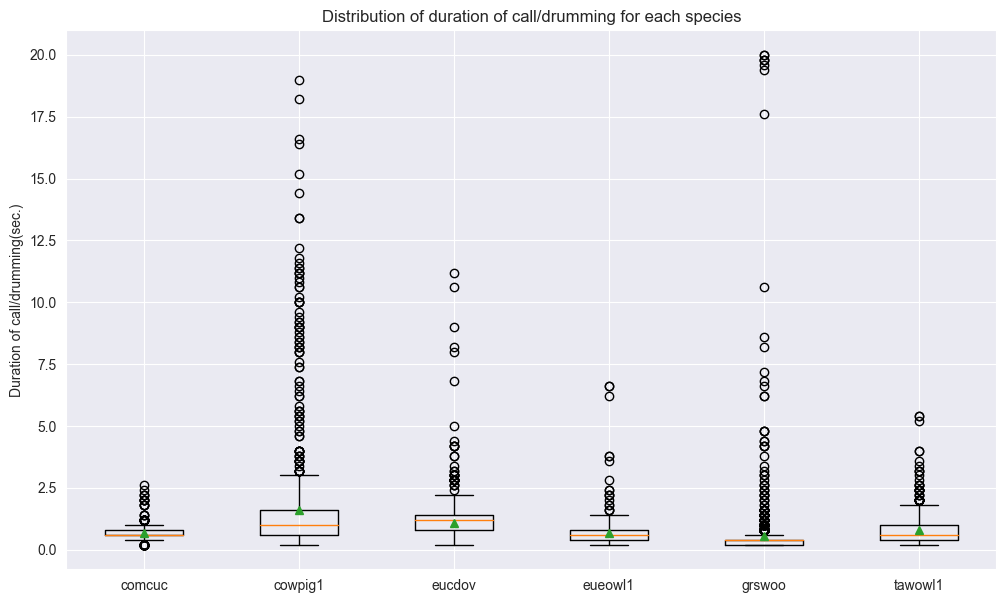

In [13]:
BirdsData('ptichki').species_call_distribution()

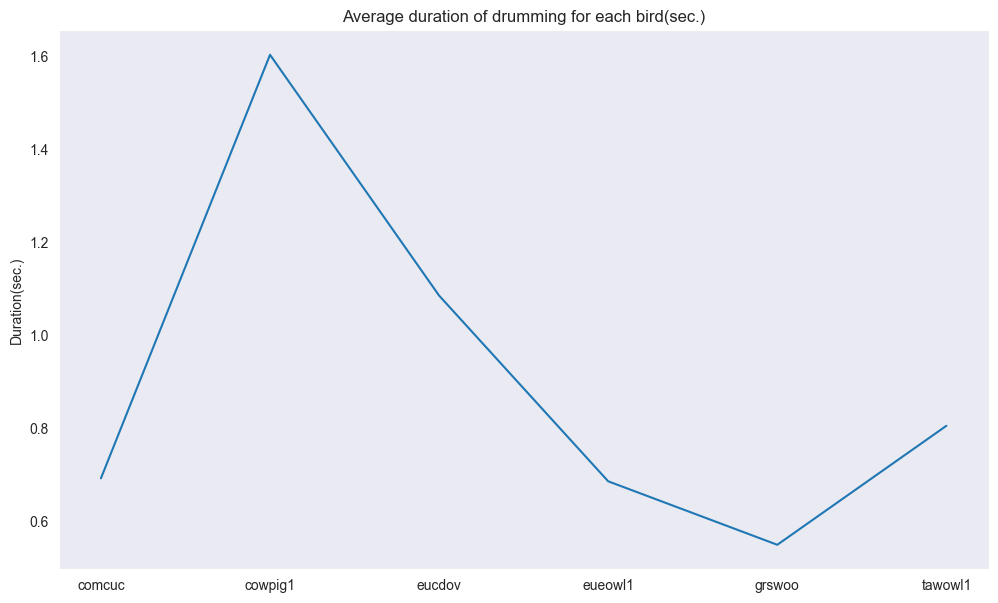

In [12]:
BirdsData('ptichki').plot_duration_means()

In [18]:
print(BirdsData('ptichki').cor_feat_label())

NotADirectoryError: [Errno 20] Not a directory: 'ptichki/.DS_Store'